<a href="https://colab.research.google.com/github/Anshika102005/Python-Essentials/blob/main/Netflix_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
#load the dataset
df = pd.read_csv('netflix_titles.csv')
#display the first 5 rows of the dataset
print(df.head())
#clean data

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

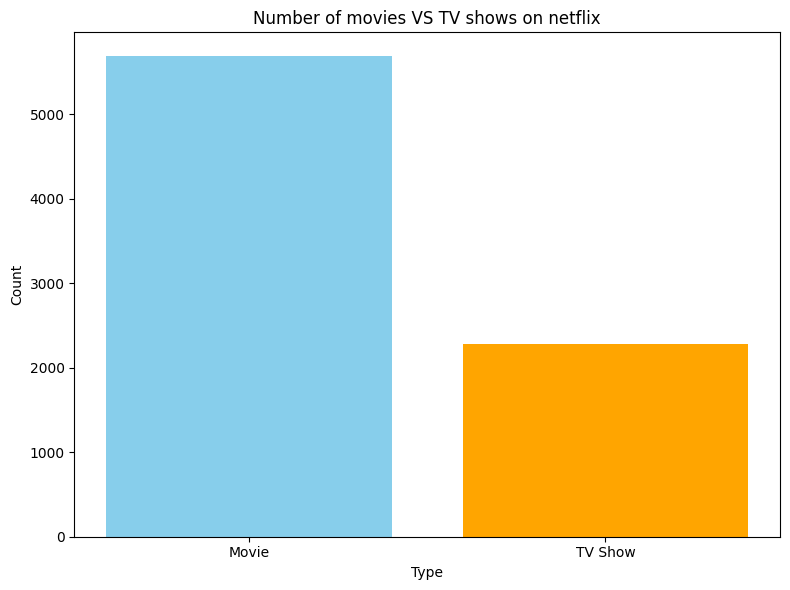

In [ ]:
#load the data
df = pd.read_csv('netflix_titles.csv')
#clean data
df = df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize = (8,6))
plt.bar(type_counts.index, type_counts.values, color =['skyblue','orange'])
plt.title('Number of movies VS TV shows on netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Movies_vs_tvshows.png')
plt.show()

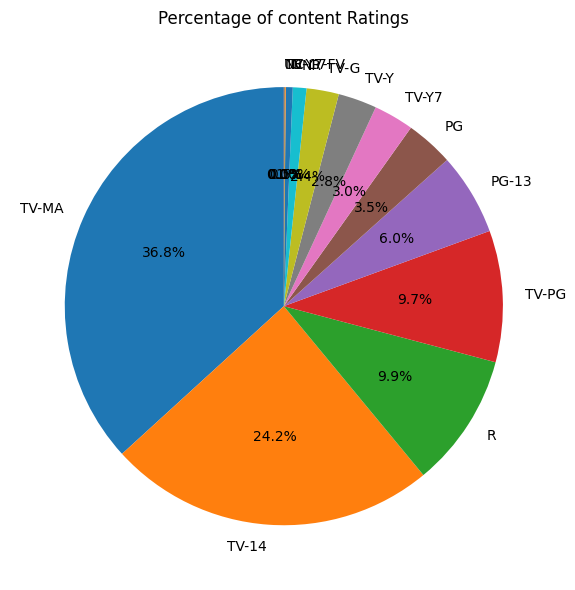

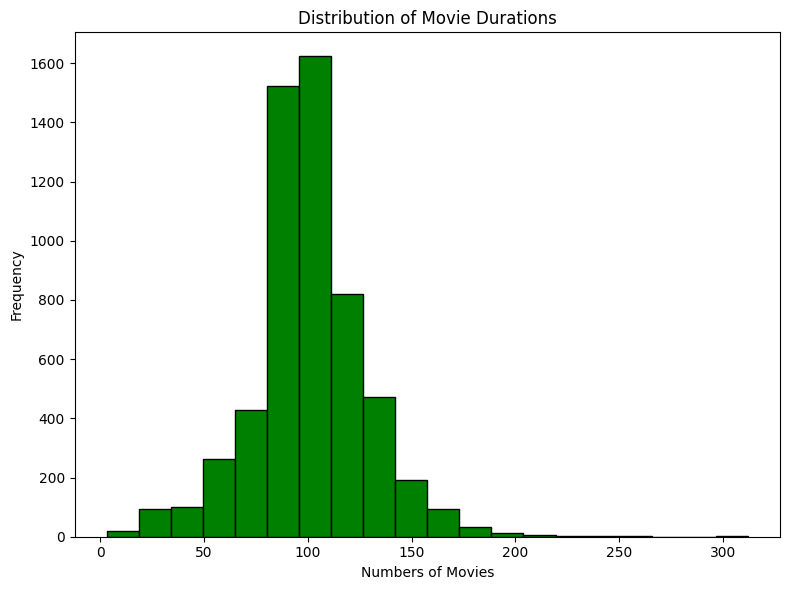

In [ ]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(rating_counts.values, labels = rating_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Percentage of content Ratings')
plt.tight_layout()
plt.savefig('Ratings_distribution_pie.png')
plt.show()

movie_df = df[df['type'] == 'Movie'].copy ()
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize = (8,6))
plt.hist(movie_df['duration'], bins = 20, color = 'green', edgecolor = 'black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Numbers of Movies')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('Movie_duration_histogram.png')
plt.show()


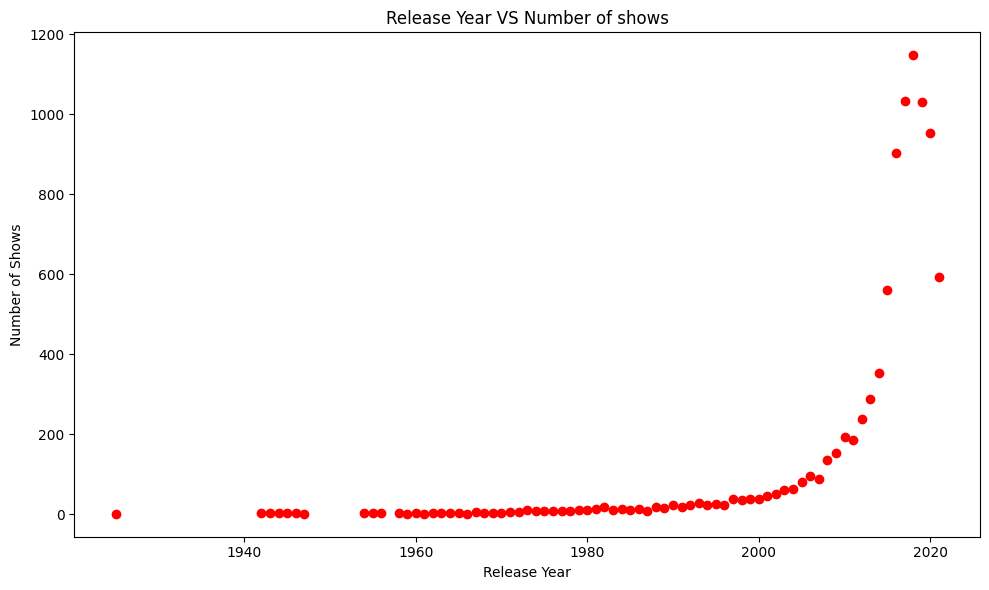

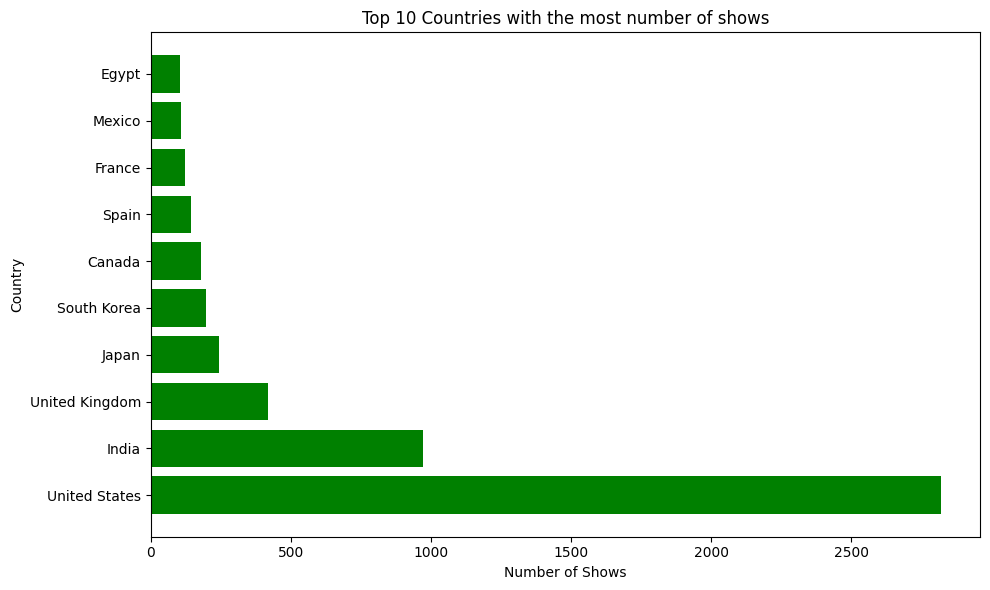

In [ ]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize = (10,6))
plt.scatter(release_counts.index, release_counts.values, color = 'red')
plt.title('Release Year VS Number of shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('Release_year_scatter.png')
plt.show()

#top 10 countries no.of shows
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize = (10,6))
plt.barh(country_counts.index, country_counts.values, color = 'green')
plt.title('Top 10 Countries with the most number of shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('Top_10_Counteries.png')
plt.show()

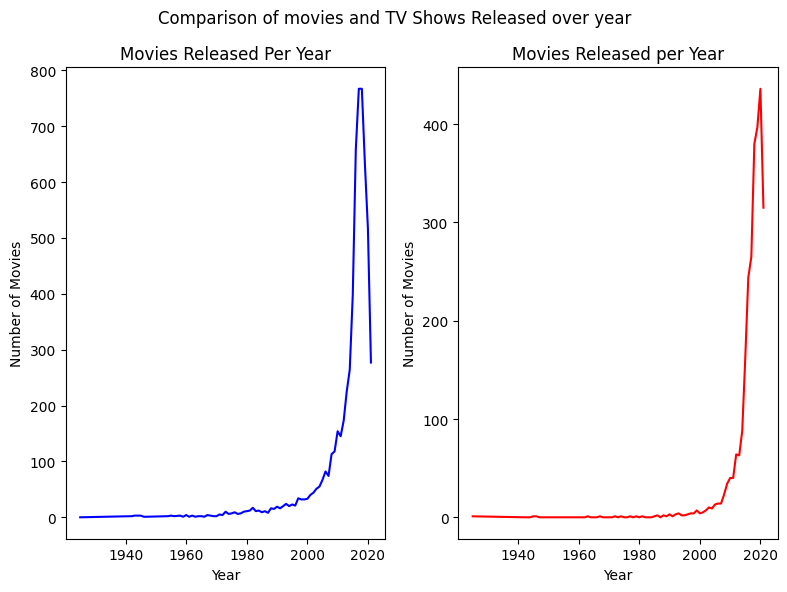

In [ ]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize = (8,6))

#first subplt: Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color = 'blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplt: TV shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color = 'red')
ax[1].set_title('Movies Released per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Movies')

fig.suptitle('Comparison of movies and TV Shows Released over year')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()